In [16]:
# imports 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
import sklearn
theme = 'seismic'
from sklearn.datasets import make_blobs
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [3]:
# read in data
df = pd.read_csv("https://raw.githubusercontent.com/mn42899/schulich_data_science/main/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived (original features)):
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


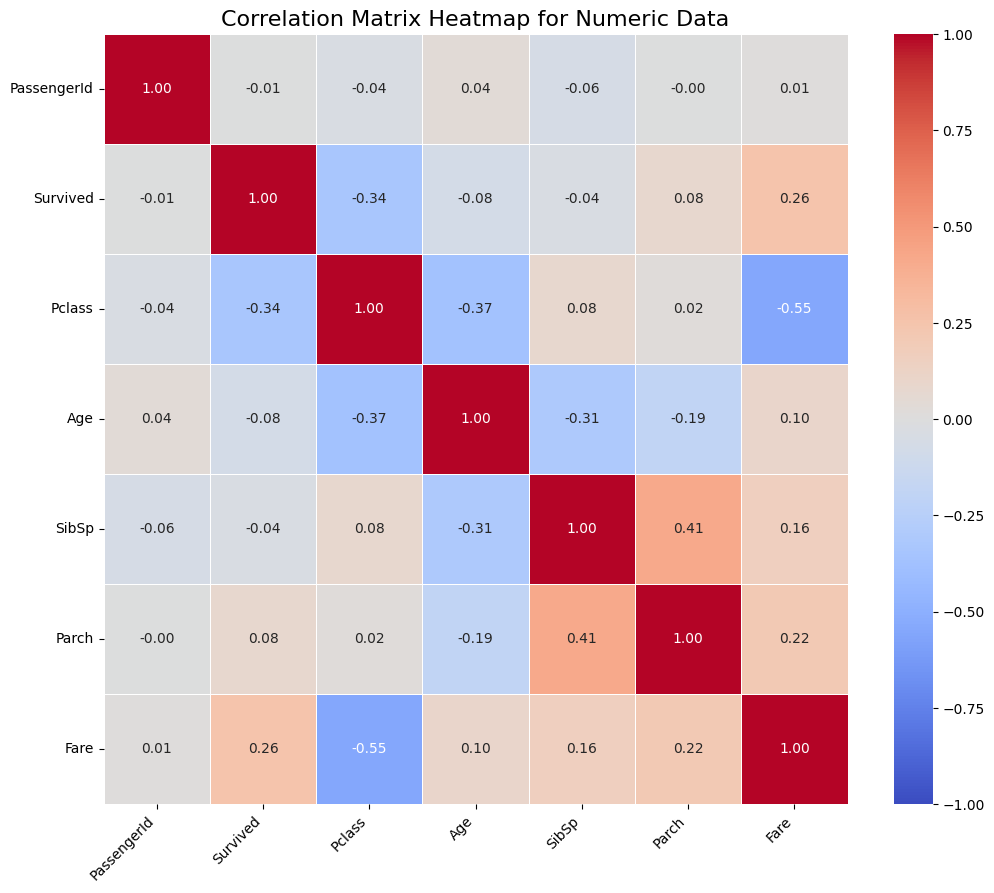

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_51282/438101836.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survive_corr.values, y=survive_corr.index, palette='viridis')


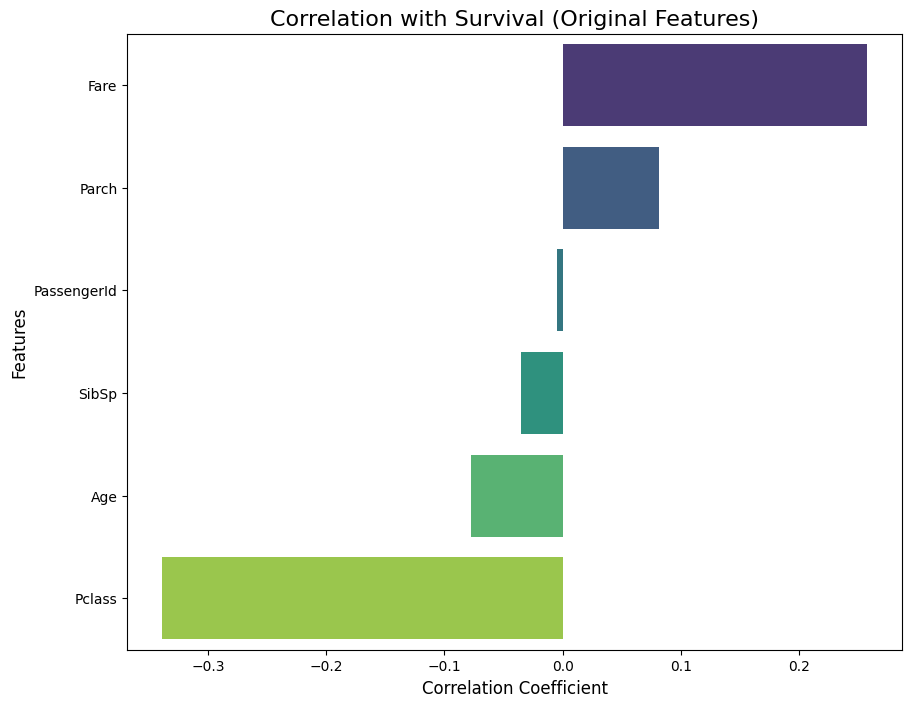

In [5]:
# Correlation Analysis
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
survive_matrix = df[numerical_features].corr()

# Correlation with the target variable
survive_corr = survive_matrix['Survived'].drop('Survived').sort_values(ascending=False)
print("Survived (original features)):")
print(survive_corr)

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(survive_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap for Numeric Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Bar plot for correlation with attrition
plt.figure(figsize=(10, 8))
sns.barplot(x=survive_corr.values, y=survive_corr.index, palette='viridis')
plt.title('Correlation with Survival (Original Features)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [6]:
# to figure out whether there are any missing values needed to impute or clean - there is not any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
def Sex_Categorical(x):
    if x == 'male':
        return 1
    elif x == 'female':
        return 2
    else:
        return 0

In [10]:
df['Sex_Categorical'] = df['Sex'].apply(Sex_Categorical)

In [12]:
X = df[['Fare', 'Parch', 'Pclass', 'Sex_Categorical']]
y = df['Survived']

In [13]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [14]:
# build our pipeline that includes these transformations
numeric_columns = ['Fare', 'Parch', 'Pclass']
categorical_columns = ['Sex_Categorical']

In [17]:
# Create a RandomForestRegressor object
model_RFR = RandomForestRegressor(n_estimators=100, random_state=42)

In [19]:
# Fit the model to the training data
model_RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
y_pred_RFR = model_RFR.predict(X_test)
y_pred_RFR

array([0.2       , 0.16810659, 0.45082788, 0.93      , 0.36      ,
       1.        , 0.67480246, 0.16016667, 0.67480246, 0.98      ,
       0.47321429, 0.10387119, 0.02      , 0.12279504, 0.14731773,
       1.        , 0.59      , 0.565     , 0.14731773, 0.        ,
       0.03711287, 0.37109678, 0.57      , 0.        , 0.        ,
       0.06333333, 0.00997222, 0.14731773, 0.06333333, 0.57      ,
       0.03711287, 0.67480246, 0.65870238, 0.94      , 0.10387119,
       0.        , 0.48419048, 0.67480246, 0.92      , 0.03711287,
       0.02      , 0.        , 0.10387119, 0.14639292, 0.04      ,
       0.42783333, 0.64747493, 0.        , 0.        , 0.76      ,
       0.99      , 1.        , 0.05666667, 0.75      , 0.14639292,
       0.98      , 0.16810659, 1.        , 0.4775    , 0.82833333,
       0.20411813, 0.88583333, 1.        , 0.08173291, 0.14639292,
       1.        , 0.02      , 0.07540079, 0.08500433, 1.        ,
       1.        , 0.98      , 0.61565476, 1.        , 0.22263

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.80      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



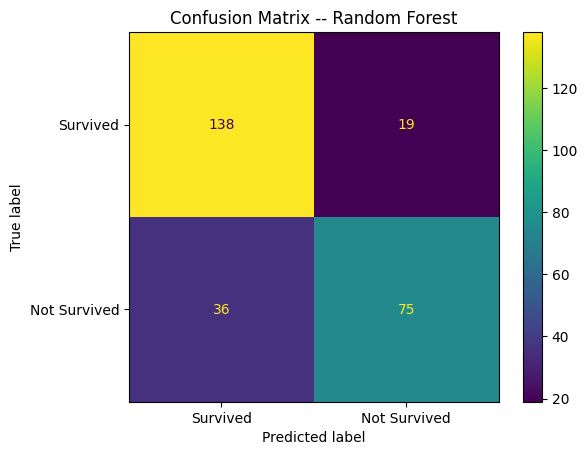

In [23]:
# Convert predictions to binary by applying a threshold
threshold_RFR = 0.5
y_pred_binary_RFR = (y_pred_RFR > threshold_RFR).astype(int)


#  RandomForestRegressor Scores
print(classification_report(y_test, y_pred_binary_RFR))

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_binary_RFR, display_labels=['Survived', 'Not Survived'])
plt.title('Confusion Matrix -- Random Forest')
plt.show()

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy.stats import mode
import time

In [34]:
data = sns.load_dataset('titanic')

In [35]:
df = data.drop(['deck','class','who','adult_male','embark_town','alive','alone'],axis=1)

In [36]:
df['age'] = df['age'].fillna(df.groupby('sex')['age'].transform('mean'))

In [37]:
df['fam'] = df['parch'] + df['sibsp']

In [38]:
df = pd.get_dummies(df, columns=['sex','embarked','pclass'], dtype=int)

In [39]:
y = df['survived']
X = df.drop('survived', axis=1)

In [40]:
all_columns = df.columns.to_list()
random_columns = [np.random.choice(all_columns, 3, replace=True).tolist() for i in range (10)]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
def build_decision_trees(X_train, y_train, num_models=10, num_columns=3):
    all_columns = X_train.columns.to_list()
    models = []
    for i in range(num_models):
        selected_columns = np.random.choice(all_columns, num_columns, replace=True).tolist()
        X_train_subset = X_train[selected_columns]
        tree = DecisionTreeClassifier(random_state=42)
        tree.fit(X_train_subset, y_train)
        models.append((tree, selected_columns))
    return models

In [43]:
models = build_decision_trees(X_train, y_train, num_models=10, num_columns=3)

In [44]:
def measure_accuracy(models, X_train, y_train):
    predictions = []
    for tree, selected_columns in models:
        X_train_subset = X_train[selected_columns]
        pred = tree.predict(X_train_subset)
        predictions.append(pred)
    predictions = np.array(predictions).T
    final_predictions, i = mode(predictions, axis=1)
    final_predictions = final_predictions.flatten()
    accuracy = accuracy_score(y_train, final_predictions)
    #print(predictions)
    #print(final_predictions)
    return accuracy